In [7]:
#IMPORTAR PACKAGES y LIBRARYS

#Librerías útiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import strptime
from scipy.signal import periodogram
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from itertools import combinations
from dateutil.relativedelta import relativedelta
from tqdm.notebook import tqdm
from pmdarima.utils import diff_inv
#otros
import warnings
warnings.filterwarnings("ignore")

#Modelos de Pruebas Estadísticas
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tools.eval_measures import mse,rmse,rmspe,bias,meanabs
import statsmodels.tsa.stattools as ts

#Modelos predictivos estadísticos
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import VAR

#Configuraciones
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
#DICCIONARIOS, OBJETOS
dic_mes = {
        'Enero': 1,
        'Febrero': 2,
        'Marzo': 3,
        'Abril':4,
         'Mayo':5,
         'Junio':6,
         'Julio':7,   
         'Agosto':8,
         'Setiembre':9,
         'Octubre':10,
         'Noviembre':11,
         'Diciembre':12
        }


In [9]:
#PREPARACIÓN_DATA

df= pd.read_excel("C:/Users/Usuario/OneDrive - prediqtdata.com/Desktop/Renato/Python/script atenea/consolidado_moderno.xlsx"
,sheet_name="Detergentes")
df.replace(dic_mes, inplace=True)
df['Quarter'] = df['MES'].apply(lambda x: 'Quarter1' if x in [1, 2, 3] else 'Quarter2' if x in [4, 5, 6] else 'Quarter3' if x in [7, 8, 9] else 'Quarter4')
df['Month_in_Quarter'] = df['MES'].apply(lambda x: 1 if x % 3 == 1 else 2 if x % 3 == 2 else 3)
df["PERIODO"]= df["AÑO"].astype(str)+"-"+df["MES"].astype(str)

df['PERIODO'] = pd.to_datetime(df['PERIODO'])    
#df['PERIODO'] = df['PERIODO'].dt.to_period('M')
df = df.set_index('PERIODO')

cols=['PERIODO','AÑO','MES','Quarter','Month_in_Quarter','OFICINA DE VENTAS'
      ,'VENTA SELL IN', 'VENTA SELL OUT TOTAL'
      , 'SHARE VOLUMEN ALICORP', 'SHARE VOLUMEN MERCADO'
      ,'SHARE % ALICORP','SHARE % MERCADO']

cols_data =['VENTA SELL IN'
      , 'VENTA SELL OUT TOTAL'
      #, 'SHARE VOLUMEN ALICORP'
      #,'SHARE VOLUMEN MERCADO'
      #,'SHARE % ALICORP'
      #,'SHARE % MERCADO'
      ]


df_ini=df[cols_data]
df_ini




,VENTA SELL IN,VENTA SELL OUT TOTAL
PERIODO,,
2019-01-01,2299.000000,1801.000000
2019-02-01,2600.000000,1615.000000
2019-03-01,2475.000000,1882.000000
2019-04-01,2097.000000,1624.000000
2019-05-01,2600.000000,1710.000000
2019-06-01,2035.000000,1971.000000
2019-07-01,2438.000000,2007.000000
2019-08-01,2169.000000,2140.000000
2019-09-01,2812.000000,2060.000000


In [10]:
# Definición Pruebas de Cointegration Johan
def eg_stat(s1, s2):
    result = ts.coint(s1, s2)
    s = ''
    s+= 'EG Statistic: %.3f\n' % result[0]
    s+= 'p-value: %.3f\n' % result[1]
    s+= 'Critical Values:\n'
    for key, value in zip(['1%', '5%', '10%'], result[2]):
        s += '%s: %.3f\n' % (key, value)
    
    if result[0] < result[2][0]:
        coint = 1
    elif result[2][0] <= result[0] and result[0] <= result[2][2]:
        coint = 2
    else:
        coint = 0
    
    return s, coint

def plot_eg_stat_test(s1,s2, ax):

    s1.plot(ax = ax, legend = s1.name)
    s2.plot(ax = ax, legend = s2.name)
    
    text_color_dict = {0:'red', 1: 'green', 2: 'yellow'}
    s, c_idx = eg_stat(s1, s2)
    
    ax.annotate(s, size=14, color='black', xy=(0.0, 0.6),xycoords='axes fraction',
                   bbox=dict(boxstyle="square,pad=0.3", fc="white", ec=text_color_dict[c_idx], lw=2))
    if c_idx == 0:
        ax.set_title('signals are not cointegrated')
    else:
        ax.set_title('signals are cointegrated')
    ax.grid()


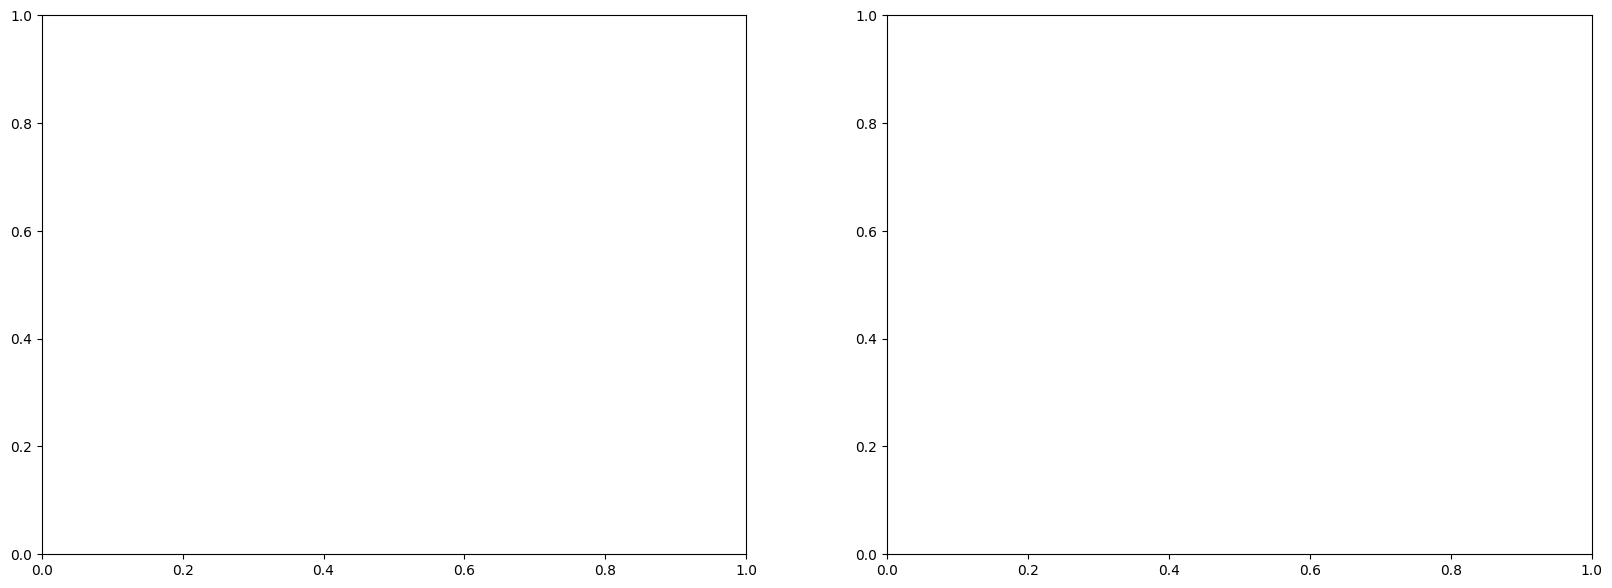

In [11]:
#ejecutar pruebas 
plt.rcParams["figure.figsize"] = (20,7)
fig, axs = plt.subplots(1, 2)

df_coint = df_ini.copy()

#plot_eg_stat_test(df_coint['VENTA SELL IN'],df_coint['VENTA SELL OUT TOTAL'], axs[0])
#plot_eg_stat_test(df_coint['VENTA SELL IN'],df_coint['SHARE VOLUMEN ALICORP'], axs[1])
plt.show()

  0%|          | 0/18 [00:00<?, ?it/s]

Text(0.5, 1.0, 'VAR, MSE: 102,819.97')

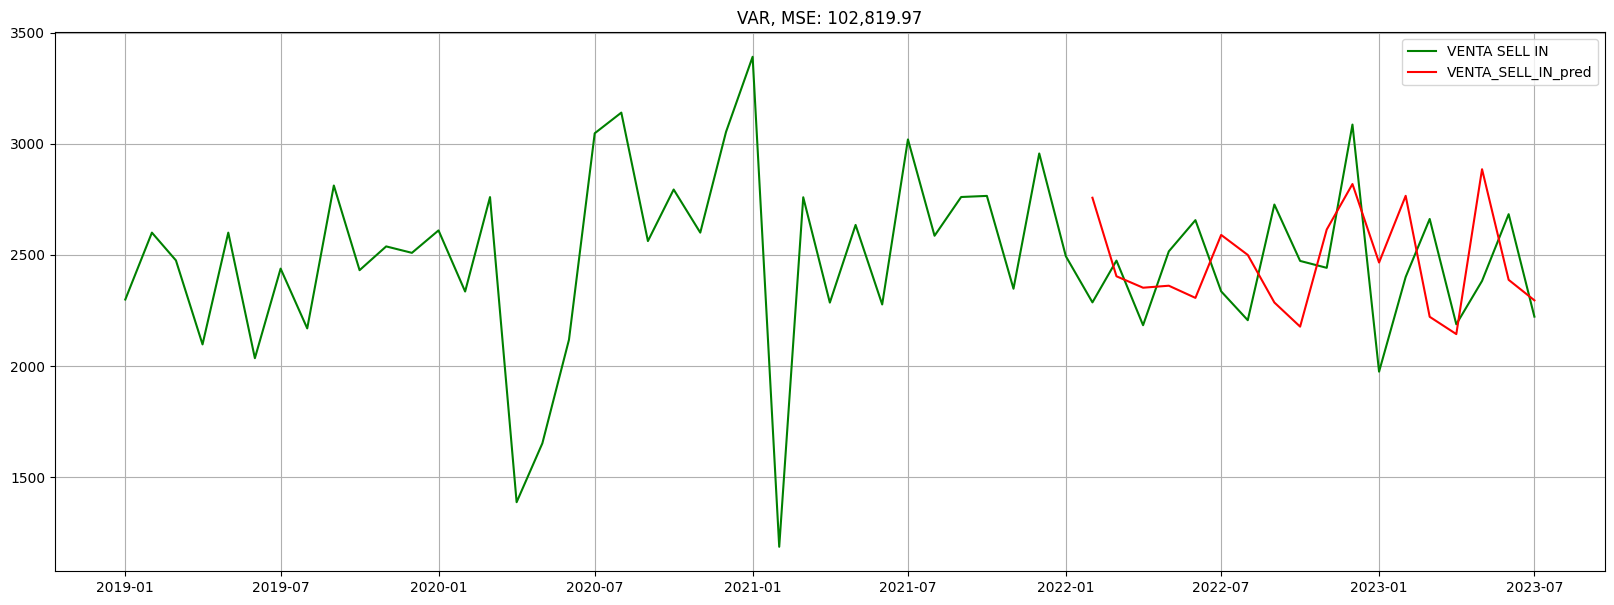

MAPE: 0.118


In [12]:

df_var = df_ini
                                           
df_1D=df_var.diff().dropna()

#df_2D=df_1D.diff().dropna()

pred_dict = {'date':[], 'VENTA_SELL_IN_1D':[], 'ci_lower':[],'ci_upper':[] }

nobs= 18

for i in tqdm(range(nobs)):
    
    training_data = df_1D[:(-nobs+i)]
    
    # VAR model selects lag p based on AIC
    
    model = VAR(training_data)
    model_fit = model.fit(ic = 'aic')
    model_results = model_fit.forecast_interval( y=training_data.to_numpy() , steps=1)

    pred_date = training_data.index[-1] + relativedelta(months = 1)
    pred_dict['date'].append(pred_date)
    pred_dict['VENTA_SELL_IN_1D'].append(model_results[0][0][0])
    pred_dict['ci_lower'].append(model_results[1][0][0])
    pred_dict['ci_upper'].append(model_results[2][0][0])



# transform data
df_pred = pd.DataFrame(pred_dict)
df_pred = df_pred.set_index('date')


df_pred= pd.concat([df_var,df_pred],axis=1,join="outer")
#df_pred= df_pred.assign(VENTA_SELL_IN_1D= None)
df_pred= df_pred.assign(VENTA_SELL_IN_pred= None)


n=df_pred.shape[0]


for i in range(2,n):
    df_pred["VENTA_SELL_IN_pred"][i] = df_pred["VENTA SELL IN"].iloc[i-1] + df_pred["VENTA_SELL_IN_1D"][i]


plt.plot(df_pred['VENTA SELL IN'], color = 'green')
plt.plot(df_pred['VENTA_SELL_IN_pred'], color = 'red')
plt.legend(['VENTA SELL IN', 'VENTA_SELL_IN_pred'])
plt.fill_between(df_pred.index,
                 df_pred['ci_lower'],
                 df_pred['ci_upper'], color='lightblue', alpha=0.5)
plt.title('VAR, MSE: {:,}'.format(round(mean_squared_error(
    df_pred['VENTA SELL IN'][-nobs:], df_pred['VENTA_SELL_IN_pred'][-nobs:]), 2)))
plt.grid()
plt.show()
MAPE= mean_absolute_percentage_error(df_pred['VENTA SELL IN'][-nobs:], df_pred['VENTA_SELL_IN_pred'][-nobs:])
print("MAPE:", round(MAPE,3))